In [1]:
import os
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta de la carpeta de datos de Google Maps
google_maps_folder = 'Google Maps/'

Cantidad de calificaciones en Google Maps: 3025011
Tipo de datos de las calificaciones en Google Maps: <class 'list'>


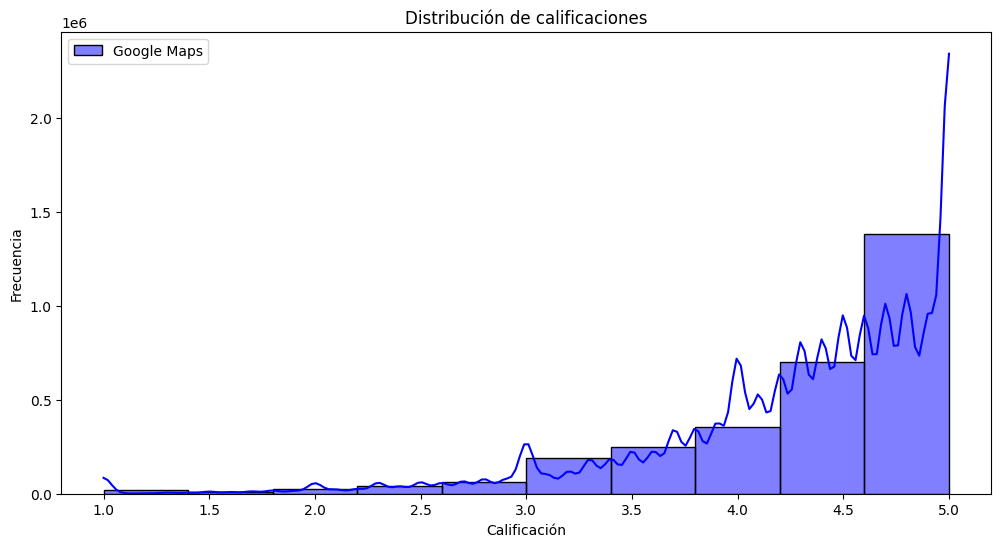

In [2]:
# 1. Explorar la distribución de las calificaciones (ratings) en Google Maps
google_maps_ratings = []

# Cargar las calificaciones de Google Maps
for filename in os.listdir(os.path.join(google_maps_folder, 'metadata-sitios')):
    if filename.endswith('.json'):
        with open(os.path.join(google_maps_folder, 'metadata-sitios', filename)) as file:
            for line in file:
                try:
                    data = json.loads(line)
                    google_maps_ratings.append(data['avg_rating'])
                except json.JSONDecodeError as e:
                    print(f"Error al cargar el archivo JSON: {filename}")
                    print(e)

# Resto del código para visualizar las distribuciones

# Calificaciones
print("Cantidad de calificaciones en Google Maps:", len(google_maps_ratings))
print("Tipo de datos de las calificaciones en Google Maps:", type(google_maps_ratings))


# Visualizar las distribuciones
plt.figure(figsize=(12, 6))
sns.histplot(google_maps_ratings, bins=10, kde=True, color='blue', label='Google Maps')

plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de calificaciones')
plt.legend()
plt.show()


Se puede ver que la gran mayoria de las puntuaciones estan entre las 4 y 5 estrellas, con una gran inclinacion hacia las 5 estrellas.
Como referencia para el trabajo vamos a tomar como un puntaje bajo a las calificaciones menores a 3.0, donde parece haber un primer pico notable de distincion en la frecuencia, y tomar como puntaje alto todo lo que este arriba de 4.5, debido a la alta frecuencia de las 5 estrellas.
El puntaje moderado entonces va a ser considerado entre 3.0 y 4.5

In [9]:
google_maps_ratings = []
total_reviews = 0
total_avg_rating = 0.0

# Cargar las calificaciones de Google Maps
for filename in os.listdir(os.path.join(google_maps_folder, 'metadata-sitios')):
    if filename.endswith('.json'):
        with open(os.path.join(google_maps_folder, 'metadata-sitios', filename)) as file:
            for line in file:
                try:
                    data = json.loads(line)
                    categories = data.get('category')
                    if categories and any(re.search(r'\bbar\b', category, re.IGNORECASE) for category in categories):
                        google_maps_ratings.append(data['avg_rating'])
                        total_reviews += data['num_of_reviews']
                        total_avg_rating += data['avg_rating']
                except json.JSONDecodeError as e:
                    print(f"Error al cargar el archivo JSON: {filename}")
                    print(e)

# Resto del código para visualizar las distribuciones

# Calificaciones
print("Cantidad de calificaciones en Google Maps sobre bares:", len(google_maps_ratings))

# Suma de valores de num_of_reviews
print("Total de reviews de vares:", total_reviews)

# Puntaje promedio de avg_rating
if len(google_maps_ratings) > 0:
    avg_rating = total_avg_rating / len(google_maps_ratings)
    print("Puntaje promedio de los bares:", avg_rating)
else:
    print("No hay calificaciones en Google Maps para calcular el puntaje promedio.")

Cantidad de calificaciones en Google Maps sobre bares: 55987
Total de reviews de vares: 6110842
Puntaje promedio de los bares: 4.235676139103616


Esta es la cantidad de calificaciones que hay en googlemaps, el total de reviews que se hicieron y el puntaje promedio en relacion exclusivamente a los bares.

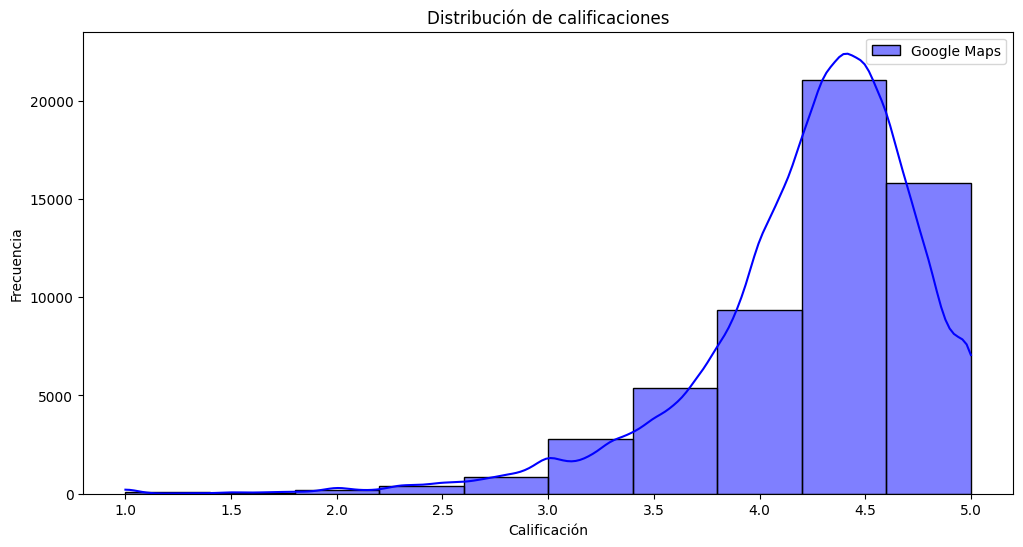

In [12]:
# Visualizar las distribuciones
plt.figure(figsize=(12, 6))
sns.histplot(google_maps_ratings, bins=10, kde=True, color='blue', label='Google Maps')

plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de calificaciones')
plt.legend()
plt.show()


como se puede ver en el grafico, el pico mas alto del puntaje esta muy cerca del puntaje promedio anterior, y en gran parte coincide con el grafico anterior respecto a los datos en general.
La principal diferencia es en la cantidad de puntajes de 5 estrellas, siendo mucho menos frecuente en comparacion.

In [10]:


categorias_total = []

# Cargar las categorías de Google Maps
for filename in os.listdir(os.path.join(google_maps_folder, 'metadata-sitios')):
    if filename.endswith('.json'):
        with open(os.path.join(google_maps_folder, 'metadata-sitios', filename)) as file:
            for line in file:
                try:
                    data = json.loads(line)
                    categories = data.get('category')
                    if categories:
                        categorias_total.extend(categories)
                except json.JSONDecodeError as e:
                    print(f"Error al cargar el archivo JSON: {filename}")
                    print(e)

# Resto del código para utilizar las categorías cargadas

print("Cantidad de categorías en Google Maps:", len(categorias_total))

Cantidad de categorías en Google Maps: 6262696


Hay una gran cantidad de categorias, probablemente porque un mismo local puede pertenecer a multiples categorias a la vez.

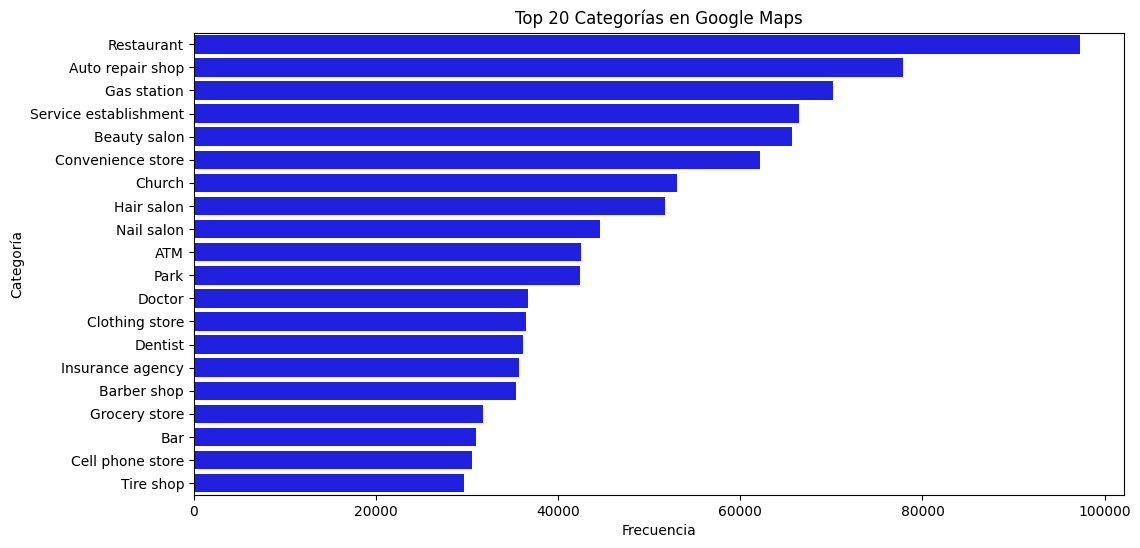

In [14]:
# Obtener las 20 categorías principales
google_maps_category_counts = pd.Series(categorias_total).value_counts().nlargest(20)

# Visualizar las categorías
plt.figure(figsize=(12, 6))
sns.barplot(x=google_maps_category_counts.values, y=google_maps_category_counts.index, color='blue')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría')
plt.title('Top 20 Categorías en Google Maps')
plt.show()


Las categorias mas numerosas en los datos de Google Maps, restaurant es una categoria muy abarcativa, por lo que tiene sentido que sea una de las mas numerosas.
Lo que sorprende es la poca frecuencia de los bares en relacion, con menos de un tercio de la cantidad en relacion a los restaurantes.

In [19]:
google_maps_categories = []

# Cargar las categorías de Google Maps
for filename in os.listdir(os.path.join(google_maps_folder, 'metadata-sitios')):
    if filename.endswith('.json'):
        with open(os.path.join(google_maps_folder, 'metadata-sitios', filename)) as file:
            for line in file:
                try:
                    data = json.loads(line)
                    categories = data.get('category')
                    if categories and any(re.search(r'\bbar\b', category, re.IGNORECASE) for category in categories):
                        google_maps_categories.extend(categories)
                except json.JSONDecodeError as e:
                    print(f"Error al cargar el archivo JSON: {filename}")
                    print(e)

# Resto del código para utilizar las categorías cargadas

print("Cantidad de categorías de bares en Google Maps:", len(google_maps_categories))

Cantidad de categorías de bares en Google Maps: 158702


Esta es la cantidad de bares en los registros de Google Maps.

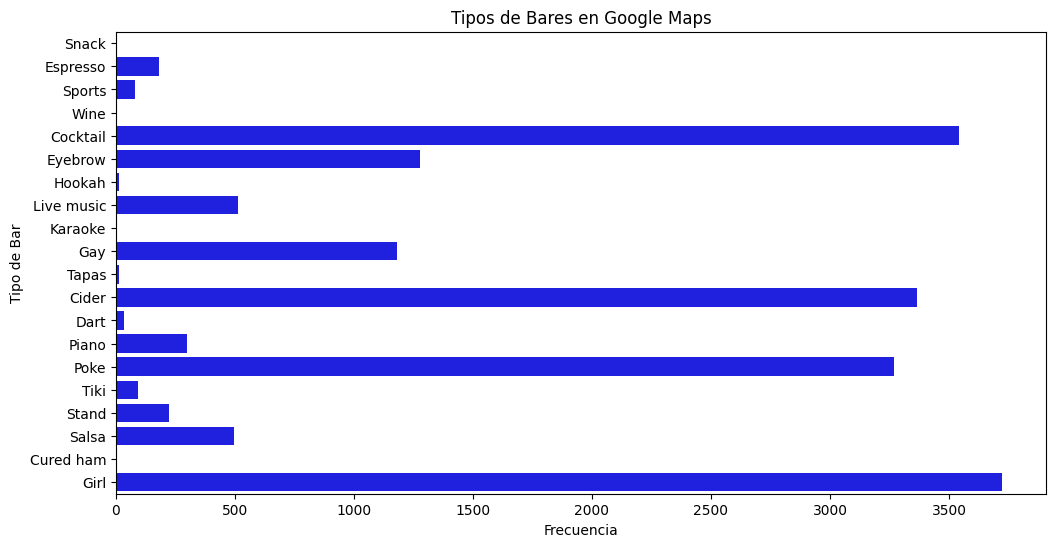

In [18]:
# Obtener los distintos tipos de bares
unique_bar_types = set()
for category in google_maps_categories:
    if re.search(r'\bbar\b', category, re.IGNORECASE):
        match = re.search(r'\b(bar)\b', category, re.IGNORECASE)
        if match:
            bar_type = category[:match.start()].strip()
            unique_bar_types.add(bar_type)

# Verificar si hay al menos un tipo de bar antes de trazar el gráfico
if unique_bar_types:
    # Calcular la frecuencia de cada tipo de bar
    bar_type_counts = [google_maps_categories.count(f"{bar_type} bar") for bar_type in unique_bar_types]

    # Ordenar los tipos de bar por frecuencia descendente
    sorted_bar_types = [x for _, x in sorted(zip(bar_type_counts, unique_bar_types), reverse=True)]

    # Tomar los primeros 20 tipos de bar más frecuentes
    top_bar_types = sorted_bar_types[:20]
    top_bar_counts = bar_type_counts[:20]

    # Visualizar los tipos de bar más frecuentes
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_bar_counts, y=top_bar_types, color='blue')
    plt.xlabel('Frecuencia')
    plt.ylabel('Tipo de Bar')
    plt.title('Tipos de Bares en Google Maps')
    plt.show()
else:
    print("No se encontraron categorías de bares en Google Maps.")

Aca se pueden ver la distribucion de los diferentes tipos de bares, donde los girl bar y cocktail bars son los mas populares, seguido de cider y poke bars.
Girl bars son lugares donde las mesas son atendidas exclusivamente por mujeres, haciendo del servicio la atraccion principal.
Cider bars es donde la cidra es la principal atraccion, mientras que un cocktail bar tiene como atraccion principal los tragos en general.
Poke bars son bares hawaiianos.
Eyebrow bar es un salon de belleza con especialidad en cejas y pestañas. No tiene nada que ver con la propuesta, asi que mas adelante se filtrara afuera del set de trabajo.